In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_train_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\sales_train.csv")
sales_test_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\test.csv")
item_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\items.csv")
item_cat_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\item_categories.csv")
shop_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\shops.csv")

print("---------------------sales_train_df---------------")
print(sales_train_df.head())
print("--------------sales_test_df------------------")
print(sales_test_df.head())
print("--------------------item_df------------------")
print(item_df.head())
print("-----------------item_cat_df -----------------")
print(item_cat_df.head())
print("--------shop_df--------------")
print(shop_df.head())

---------------------sales_train_df---------------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
--------------sales_test_df------------------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
--------------------item_df------------------
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***Г

In [3]:
#Merging all the files as  sales_train_df
sales_train_df = sales_train_df.merge(item_df, on='item_id', how='left').merge(shop_df, on= "shop_id", how='left').merge(item_cat_df, on= "item_category_id", how='left')
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [4]:
#converting date into date time format
sales_train_df["date"]  = pd.to_datetime(sales_train_df["date"], dayfirst= True)
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   shop_name           object        
 9   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB


In [6]:
sales_train_df.shape

(2935849, 10)

In [7]:
sales_train_df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
shop_name             0
item_category_name    0
dtype: int64

In [8]:
sales_train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [9]:
#Unique value 
print("No of shops: " + str(sales_train_df["shop_id"].nunique()))
print("No of items: " + str(sales_train_df["item_id"].nunique()))
print("No of items categories: " + str(sales_train_df["item_category_id"].nunique()))

No of shops: 60
No of items: 21807
No of items categories: 84


In [10]:
print("---------------------item_cnt_day-------------------")
print(sales_train_df["item_cnt_day"].value_counts().sort_index(ascending= False))
print("----------------------item_price------------------")
print(sales_train_df["item_price"].value_counts().sort_index(ascending= False))

---------------------item_cnt_day-------------------
 2169.0    1
 1000.0    1
 669.0     1
 637.0     1
 624.0     1
          ..
-5.0       4
-6.0       2
-9.0       1
-16.0      1
-22.0      1
Name: item_cnt_day, Length: 198, dtype: int64
----------------------item_price------------------
 307980.0000       1
 59200.0000        1
 50999.0000        1
 49782.0000        1
 42990.0000        4
                ... 
 0.1000         2932
 0.0900            1
 0.0875            1
 0.0700            2
-1.0000            1
Name: item_price, Length: 19993, dtype: int64


# In item_cnt_day there are negative values: Assuming that on that day there was no sale while there were some products returned.

# In item_price there are negative values as well: This is not possible thus removing that row

In [13]:
sales_train_df[sales_train_df["item_price"]< 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
484683,2013-05-15,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,"Москва ТЦ ""Серебряный Дом""",Игры - PS3


In [14]:
# Only taking those rows having item_price > 0 
#sales_train_df = sales_train_df[sales_train_df["item_price"]> 0 ]

In [15]:
#Checking
sales_train_df["item_price"].value_counts().sort_index(ascending= False)

 307980.0000       1
 59200.0000        1
 50999.0000        1
 49782.0000        1
 42990.0000        4
                ... 
 0.1000         2932
 0.0900            1
 0.0875            1
 0.0700            2
-1.0000            1
Name: item_price, Length: 19993, dtype: int64

In [16]:
#Imputing negative item_cnt_day with 0
sales_train_df.item_cnt_day[sales_train_df.item_cnt_day < 0 ] = 0

In [17]:
#Checking
sales_train_df["item_cnt_day"].value_counts().sort_index(ascending= False)

2169.0          1
1000.0          1
669.0           1
637.0           1
624.0           1
           ...   
4.0         19685
3.0         47350
2.0        194201
1.0       2629372
0.0          7356
Name: item_cnt_day, Length: 190, dtype: int64

In [18]:
sales_train_df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
2935844,2015-10-10,33,25,7409,299.0,1.0,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935845,2015-10-09,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935846,2015-10-14,33,25,7459,349.0,1.0,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935847,2015-10-22,33,25,7440,299.0,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",Музыка - MP3
2935848,2015-10-03,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [19]:
#Extracting Year, Month, Day and  Quarter
sales_train_df["Year"] = pd.to_datetime(sales_train_df["date"]).dt.year
sales_train_df["Month"] = pd.to_datetime(sales_train_df["date"]).dt.month
sales_train_df["Day"] = pd.to_datetime(sales_train_df["date"]).dt.day
sales_train_df["Quarter"] = pd.to_datetime(sales_train_df["date"]).dt.quarter

In [20]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,Year,Month,Day,Quarter
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,2013,1,2,1
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,3,1
2,2013-01-05,0,25,2552,899.00,0.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,5,1
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,6,1
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,2013,1,15,1


# EDA

Text(0, 0.5, 'Item_cnt')

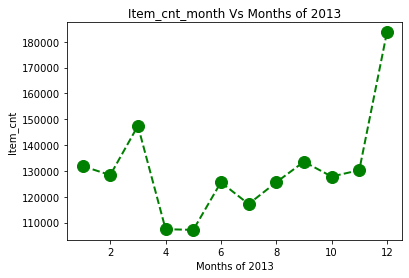

In [21]:
#Sales in Months of 2013
df1 = sales_train_df[sales_train_df["Year"]==2013][["Month","item_cnt_day"]].groupby(["Month"]).sum().reset_index()
plt.plot(df1["Month"], df1["item_cnt_day"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12 )
plt.title('Item_cnt_month Vs Months of 2013')
plt.xlabel('Months of 2013')
plt.ylabel('Item_cnt')

Text(0, 0.5, 'Item_cnt')

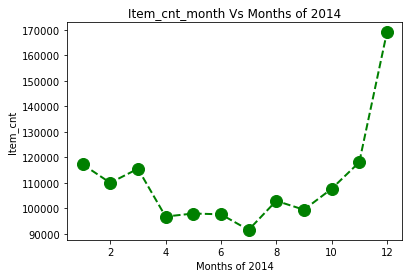

In [22]:
#Sales in Months of 2014
df1 = sales_train_df[sales_train_df["Year"]==2014][["Month","item_cnt_day"]].groupby(["Month"]).sum().reset_index()
plt.plot(df1["Month"], df1["item_cnt_day"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12 )
plt.title('Item_cnt_month Vs Months of 2014')
plt.xlabel('Months of 2014')
plt.ylabel('Item_cnt')

Text(0, 0.5, 'Item_cnt')

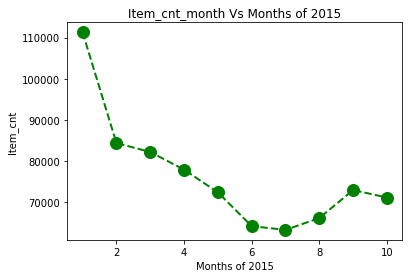

In [23]:
#Sales in Months of 2015
df1 = sales_train_df[sales_train_df["Year"]==2015][["Month","item_cnt_day"]].groupby(["Month"]).sum().reset_index()
plt.plot(df1["Month"], df1["item_cnt_day"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12 )
plt.title('Item_cnt_month Vs Months of 2015')
plt.xlabel('Months of 2015')
plt.ylabel('Item_cnt')

# We can see that at the end of 2013 and 2014 there is increase / spike in sales
##This may occur due to year end sale offers or festive season purchase

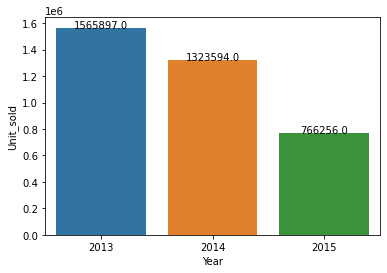

In [24]:
#unit_sold on year
Units_yearly = sales_train_df[["Year", "item_cnt_day"]].groupby(by = ["Year"]).sum().reset_index()
bar = sns.barplot(x="Year", y="item_cnt_day",  data= Units_yearly )
bar.set(xlabel="Year", ylabel = "Unit_sold")
for index, row in Units_yearly.iterrows():
    bar.text(row.name,row.item_cnt_day, round(row.item_cnt_day,2),  color='black', ha="center")

# Units_sold are decreasing Y-O-Y

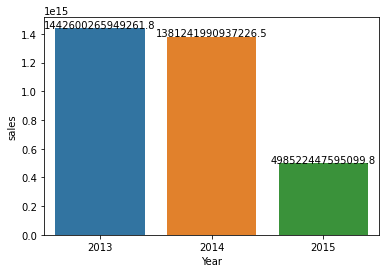

In [25]:
#Remove:::sale on year
sales_yearly = sales_train_df[["Year", "item_cnt_day", "item_price"]].groupby(by = ["Year"]).sum().reset_index()
sales_yearly["sales"] = sales_yearly["item_cnt_day"]*sales_yearly["item_price"]

bar1 = sns.barplot(x="Year", y="sales",  data= sales_yearly )
bar1.set(xlabel="Year", ylabel = "sales")
for index, row in sales_yearly.iterrows():
    bar1.text(row.name,row.sales, round(row.sales,2),  color='black', ha="center")

<AxesSubplot:>

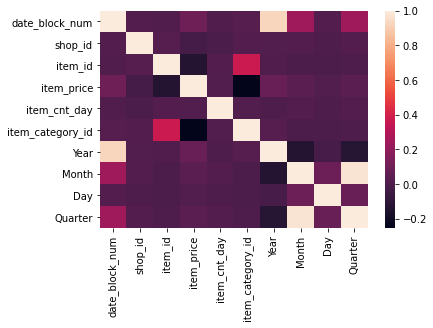

In [26]:
#Checking correlation
sns.heatmap(sales_train_df.corr())

In [27]:
#Cnt on the basis of month, item_id, shop_id
cnt_by_month=sales_train_df.groupby('date_block_num').sum()
cnt_by_month=cnt_by_month.drop(['shop_id', 'item_id', 'item_price', 'item_category_id'], axis=1)
cnt_by_month.reset_index(inplace=True)

cnt_by_item=sales_train_df.groupby('item_id').sum()
cnt_by_item=cnt_by_item.drop(['shop_id', 'date_block_num', 'item_price', 'item_category_id'], axis=1)
cnt_by_item.reset_index(inplace=True)

cnt_by_shop=sales_train_df.groupby('shop_id').sum()
cnt_by_shop=cnt_by_shop.drop(['item_id', 'date_block_num', 'item_price', 'item_category_id'], axis=1)
cnt_by_shop.reset_index(inplace=True)

Text(0.5, 0.98, 'Solds per Shop')

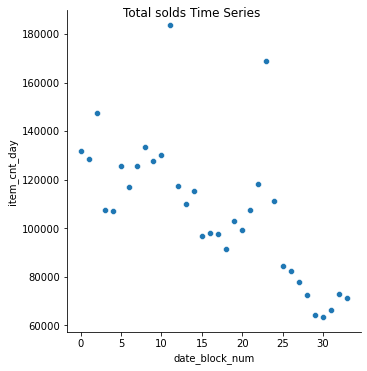

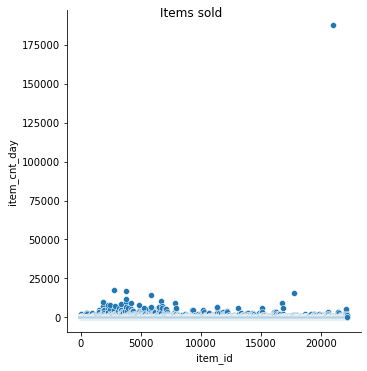

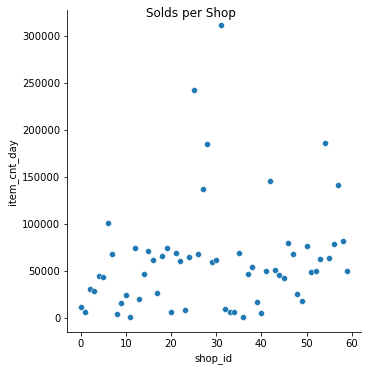

In [28]:
fig1 = sns.relplot(x='date_block_num', y='item_cnt_day', data=cnt_by_month)
fig1a = fig1.fig 
fig1a.suptitle("Total solds Time Series", fontsize=12)


fig2 = sns.relplot(x='item_id', y='item_cnt_day', data=cnt_by_item)
fig2a = fig2.fig 
fig2a.suptitle("Items sold", fontsize=12)


fig3 = sns.relplot(x='shop_id', y='item_cnt_day', data=cnt_by_shop)
fig3a = fig3.fig 
fig3a.suptitle("Solds per Shop", fontsize=12)

In [29]:
print('Best Selling Months:')
date_outlier=[i for i in cnt_by_month['item_cnt_day'] if i > 160000]
date_outlier1=pd.DataFrame({"item_cnt_day": date_outlier})
date_outlier2 = pd.merge(date_outlier1, cnt_by_month, on ='item_cnt_day', how ='inner')
date_outlier2

Best Selling Months:


,item_cnt_day,date_block_num,Year,Month,Day,Quarter
0,183670.0,11,288354198,1718952,2726300,572984
1,169055.0,23,263403004,1569432,2531688,523144


# 11th date_block_num i.e. Dec-2013 and Dec-2014 have the highest sale: Year end sale== Seasonality / Seasonal Outlier

In [30]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,Year,Month,Day,Quarter
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,2013,1,2,1
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,3,1
2,2013-01-05,0,25,2552,899.00,0.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,5,1
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,6,1
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,2013,1,15,1


In [31]:
#Removing not required columns:
sales_train_df.drop(["item_name", "item_category_id", "shop_name",  "item_category_name", "Year", "Month", "Day","Quarter"], axis =1,  inplace = True)
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,0.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


# Creating dataset for model

In [32]:
#Using Pivot Table
train_df = sales_train_df.pivot_table(index = ["shop_id", "item_id"], values = ["item_cnt_day"], columns= ["date_block_num"], aggfunc= "sum")
train_df.reset_index(inplace = True)
train_df.head()

shop_id item_id item_cnt_day                                \
date_block_num                            0     1   2   3   4   5   6   7   
0                    0      30          NaN  31.0 NaN NaN NaN NaN NaN NaN   
1                    0      31          NaN  11.0 NaN NaN NaN NaN NaN NaN   
2                    0      32          6.0  10.0 NaN NaN NaN NaN NaN NaN   
3                    0      33          3.0   3.0 NaN NaN NaN NaN NaN NaN   
4                    0      35          1.0  14.0 NaN NaN NaN NaN NaN NaN   

                ...                                          
date_block_num  ...  24  25  26  27  28  29  30  31  32  33  
0               ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1               ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2               ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3               ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4               ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 36 columns]

In [33]:
train_df.tail()

shop_id item_id item_cnt_day                               ...  \
date_block_num                            0   1   2   3   4   5    6   7  ...   
424119              59   22154          1.0 NaN NaN NaN NaN NaN  NaN NaN  ...   
424120              59   22155          NaN NaN NaN NaN NaN NaN  1.0 NaN  ...   
424121              59   22162          NaN NaN NaN NaN NaN NaN  NaN NaN  ...   
424122              59   22164          NaN NaN NaN NaN NaN NaN  NaN NaN  ...   
424123              59   22167          NaN NaN NaN NaN NaN NaN  NaN NaN  ...   

                                                              
date_block_num  24   25   26   27   28  29   30   31  32  33  
424119         NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
424120         NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  
424121         NaN  9.0  4.0  1.0  1.0 NaN  NaN  1.0 NaN NaN  
424122         NaN  2.0  1.0  2.0  NaN NaN  1.0  NaN NaN NaN  
424123         NaN  NaN  NaN  NaN  NaN NaN  NaN  NaN NaN NaN  

[5 rows x 36 columns]

In [34]:
#Filling na with 0
train_df.fillna(0, inplace = True )
train_df.head()

shop_id item_id item_cnt_day                                 \
date_block_num                            0     1    2    3    4    5    6   
0                    0      30          0.0  31.0  0.0  0.0  0.0  0.0  0.0   
1                    0      31          0.0  11.0  0.0  0.0  0.0  0.0  0.0   
2                    0      32          6.0  10.0  0.0  0.0  0.0  0.0  0.0   
3                    0      33          3.0   3.0  0.0  0.0  0.0  0.0  0.0   
4                    0      35          1.0  14.0  0.0  0.0  0.0  0.0  0.0   

                     ...                                                    
date_block_num    7  ...   24   25   26   27   28   29   30   31   32   33  
0               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 36 columns]

In [35]:
train_df.rename(columns={"item_cnt_day": "item_cnt_month"}, inplace= True)
train_df.head()

shop_id item_id item_cnt_month                                 \
date_block_num                              0     1    2    3    4    5    6   
0                    0      30            0.0  31.0  0.0  0.0  0.0  0.0  0.0   
1                    0      31            0.0  11.0  0.0  0.0  0.0  0.0  0.0   
2                    0      32            6.0  10.0  0.0  0.0  0.0  0.0  0.0   
3                    0      33            3.0   3.0  0.0  0.0  0.0  0.0  0.0   
4                    0      35            1.0  14.0  0.0  0.0  0.0  0.0  0.0   

                     ...                                                    
date_block_num    7  ...   24   25   26   27   28   29   30   31   32   33  
0               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4               0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 36 columns]

In [36]:
sales_test_df.shape

(214200, 3)

In [37]:
#Stroring ID column and removing it from test file as train file doesnot have ID column
ID = sales_test_df["ID"]
ID.head()

0    0
1    1
2    2
3    3
4    4
Name: ID, dtype: int64

In [38]:
test_df = sales_test_df.drop(["ID"], axis = 1)
print(test_df.head())
print(test_df.shape)


   shop_id  item_id
0        5     5037
1        5     5320
2        5     5233
3        5     5232
4        5     5268
(214200, 2)


In [39]:
#Merging the test set with train set so that we have same shape as submission file i.e. 214200 rows

dataset = pd.merge(test_df, train_df, on = ["shop_id", "item_id"], how = "left" )
dataset.head()

,shop_id,item_id,"(item_cnt_month, 0)","(item_cnt_month, 1)","(item_cnt_month, 2)","(item_cnt_month, 3)","(item_cnt_month, 4)","(item_cnt_month, 5)","(item_cnt_month, 6)","(item_cnt_month, 7)",...,"(item_cnt_month, 24)","(item_cnt_month, 25)","(item_cnt_month, 26)","(item_cnt_month, 27)","(item_cnt_month, 28)","(item_cnt_month, 29)","(item_cnt_month, 30)","(item_cnt_month, 31)","(item_cnt_month, 32)","(item_cnt_month, 33)"
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(dataset.shape)

(214200, 36)


In [41]:
dataset.isnull().sum().sum()

3495064

In [42]:
#fillna with 0
dataset.fillna(0, inplace = True)
dataset.isnull().sum().sum()

0

In [43]:
#Removing shop_id and item_id columns as they are primary keys and does not help in forecasting
#This will make out model robust as the forecast values will not be dependent on shop_id or item_id
dataset.drop(["shop_id", "item_id"], axis = 1, inplace = True)
dataset.head()

,"(item_cnt_month, 0)","(item_cnt_month, 1)","(item_cnt_month, 2)","(item_cnt_month, 3)","(item_cnt_month, 4)","(item_cnt_month, 5)","(item_cnt_month, 6)","(item_cnt_month, 7)","(item_cnt_month, 8)","(item_cnt_month, 9)",...,"(item_cnt_month, 24)","(item_cnt_month, 25)","(item_cnt_month, 26)","(item_cnt_month, 27)","(item_cnt_month, 28)","(item_cnt_month, 29)","(item_cnt_month, 30)","(item_cnt_month, 31)","(item_cnt_month, 32)","(item_cnt_month, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


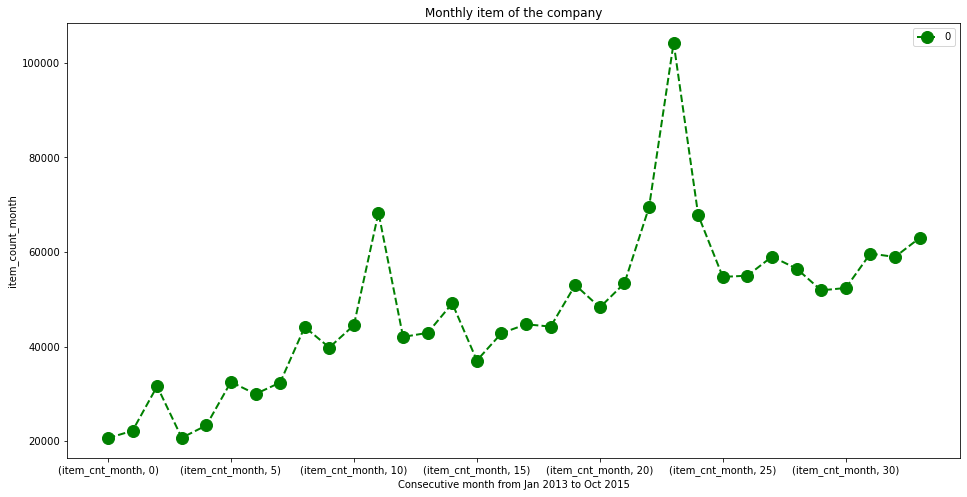

In [44]:
df = pd.DataFrame(dataset.sum())
df.plot(figsize= (16,8), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)


plt.title("Monthly item of the company")
plt.xlabel("Consecutive month from Jan 2013 to Oct 2015")
plt.ylabel("item_count_month")
plt.show()

In [45]:
#Creating train- test dataset

#Last column is kept as label i.e. y_train
X_train = dataset.iloc[:, :-1]
y_train = dataset.iloc[:, -1:]

# for test we keep all the column except 1st column. Since the shape of X_train and X_test must be same
X_test = dataset.iloc[: , 1:]

Train_Val Test split Prediction
train = Jan-2013 to June-2015
val = July Aug Sept 2015 (Y_label)

test = Oct-2015

Pred = Nov-2015

In [46]:
#Checking shape
print("Shape of X_train: " + str(X_train.shape))
print("Shape of Y_train: " + str(y_train.shape))
print("Shape of X_test: "  + str(X_test.shape))

Shape of X_train: (214200, 33)
Shape of Y_train: (214200, 1)
Shape of X_test: (214200, 33)


# Model 

# 1) Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [81]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_train)


#Mean Squared Error
#Mean Absolute Error
print("MSE: " + str(mean_squared_error(y_train, y_pred)))
print("MAE: " +str(mean_absolute_error(y_train, y_pred)))

MSE: 14.956349520726459
MAE: 0.6694047449034326


Mean Squared Error is high (14.95) and 
Mean Absolute Error is also high (0.66)
::) Model is not performing well

In [82]:
#Model Prediction
Pred_lm = lm.predict(X_test)
Pred_lm

array([[ 1.86511066],
       [-0.0571469 ],
       [ 1.20869009],
       ...,
       [-0.46927545],
       [-0.0571469 ],
       [ 0.23978425]])

# 2) AdaBoostRegressor

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

Ada = AdaBoostRegressor(random_state=202)

In [83]:
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_train)

#Mean Squared Error
#Mean Absolute Error
print("MSE: " + str(mean_squared_error(y_train, y_pred)))
print("MAE: " +str(mean_absolute_error(y_train, y_pred)))

MSE: 2.3950453565394976
MAE: 0.4626312193779103


Since mean squared error is low ( 2.39) and Mean Absolute Error is also low (0.46) ::) Model is performing  well

In [84]:
#Model Prediction
Pred_Ada = Ada.predict(X_test)
Pred_Ada

array([0.27220295, 0.27220295, 0.27220295, ..., 0.27220295, 0.27220295,
       0.27220295])

# 3) XGBoost

In [85]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [86]:
xg = XGBRegressor(random_state = 202)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_train)

#Mean Squared Error
#Mean Absolute Error
print("MSE: " + str(mean_squared_error(y_train, y_pred)))
print("MAE: " +str(mean_absolute_error(y_train, y_pred)))

MSE: 1.4277853569165357
MAE: 0.32618147557937704


MSE is lowest (1.42) and MAE is also lowest (0.32) ::)Model is performing well.
Thus, XGBoost is the Champion Model

In [87]:
#Model Prediction
Pred_xg = Ada.predict(X_test)
Pred_xg

array([0.27220295, 0.27220295, 0.27220295, ..., 0.27220295, 0.27220295,
       0.27220295])

In [88]:
Month_cnt_34 = pd.Series( Pred_xg.sum())
Month_cnt_34

0    62264.032133
dtype: float64

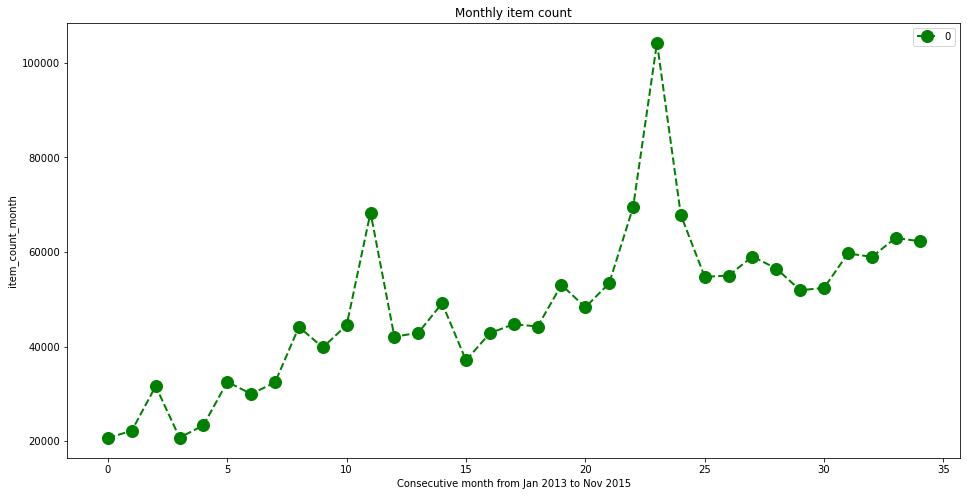

In [89]:
df1 = df.append(Month_cnt_34, ignore_index=True )
df1.reset_index()

df1.plot(figsize= (16,8), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title("Monthly item count")
plt.xlabel("Consecutive month from Jan 2013 to Nov 2015")
plt.ylabel("item_count_month")
plt.show()

Conclusion:
    1) At the end of 2013 and 2014 there is increase / spike in sales due to year end offers (Seasonality)
    2)  XGBoost is the champion model with lowest mean squared error
    3) Year end spike is not observed in 2015 sales..

In [65]:
#Submission File
submit_file = pd.DataFrame({"ID": ID, "item_cnt_month": Pred_xg.ravel()})
submit_file.reset_index()
submit_file.head()

,ID,item_cnt_month
0,0,0.272203
1,1,0.272203
2,2,0.272203
3,3,0.272203
4,4,0.272203


In [66]:
train_set = sales_train_df.copy()

In [67]:
#Extracting Year, Month, Day and  Quarter
train_set["Year"] = pd.to_datetime(train_set["date"]).dt.year
sales_train_df["Month"] = pd.to_datetime(train_set["date"]).dt.month
train_set["Day"] = pd.to_datetime(train_set["date"]).dt.day
train_set["Quarter"] = pd.to_datetime(train_set["date"]).dt.quarter
train_set.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Day,Quarter
0,2013-01-02,0,59,22154,999.00,1.0,2013,2,1
1,2013-01-03,0,25,2552,899.00,1.0,2013,3,1
2,2013-01-05,0,25,2552,899.00,0.0,2013,5,1
3,2013-01-06,0,25,2554,1709.05,1.0,2013,6,1
4,2013-01-15,0,25,2555,1099.00,1.0,2013,15,1


In [69]:
dataset = pd.merge(test_df, train_set, on = ["shop_id", "item_id"], how = "left" )
dataset.fillna(0, inplace = True)
dataset.isnull().sum().sum()

0

In [70]:
dataset.head()

,shop_id,item_id,date,date_block_num,item_price,item_cnt_day,Year,Day,Quarter
0,5,5037,2014-09-21 00:00:00,20.0,2599.0,1.0,2014.0,21.0,3.0
1,5,5037,2014-11-29 00:00:00,22.0,2599.0,1.0,2014.0,29.0,4.0
2,5,5037,2014-12-28 00:00:00,23.0,1999.0,1.0,2014.0,28.0,4.0
3,5,5037,2014-12-20 00:00:00,23.0,1999.0,1.0,2014.0,20.0,4.0
4,5,5037,2015-01-02 00:00:00,24.0,1999.0,1.0,2015.0,2.0,1.0


In [73]:
#For sample case
df_sample = dataset.loc[(dataset.shop_id == 5) & (dataset.item_id== 5037)]
df_sample = df_sample.sort_values(by = "date")
print(df_sample)
df_sample.shape

    shop_id  item_id                 date  date_block_num  item_price  \
0         5     5037  2014-09-21 00:00:00            20.0      2599.0   
1         5     5037  2014-11-29 00:00:00            22.0      2599.0   
3         5     5037  2014-12-20 00:00:00            23.0      1999.0   
2         5     5037  2014-12-28 00:00:00            23.0      1999.0   
4         5     5037  2015-01-02 00:00:00            24.0      1999.0   
5         5     5037  2015-01-07 00:00:00            24.0      1999.0   
6         5     5037  2015-05-29 00:00:00            28.0      1299.0   
7         5     5037  2015-06-28 00:00:00            29.0      1499.0   
8         5     5037  2015-07-05 00:00:00            30.0      1499.0   
9         5     5037  2015-08-14 00:00:00            31.0      1499.0   
10        5     5037  2015-08-20 00:00:00            31.0       749.5   
11        5     5037  2015-08-31 00:00:00            31.0       749.0   
12        5     5037  2015-09-05 00:00:00          

(13, 9)

In [75]:
dataset.groupby(["shop_id", "item_id"]).size().sort_values()

shop_id  item_id
22       22068        1
49       17979        1
31       4767         1
         4765         1
         4764         1
                   ... 
42       20949      834
22       20949      848
31       20949      863
53       20949      863
28       20949      867
Length: 214200, dtype: int64

4) Time Series
::) Since, none of the Shop_id and item_id combination has data for all dates (2 years 11 month, 1063), have not applied time series analysis… Solution: We will have to find out which dates data are missing and impute them. It may be the case where large chunk of data may be missing in between. In that case forecasting would be inaccurate.